In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dfTitanicTrain = pd.read_csv("titanic_train.csv")
dfTitanicTest = pd.read_csv("titanic_test.csv")

In [3]:
dfTitanicTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dfTitanicTrain.shape

(891, 12)

In [5]:
dfTitanicTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
dfTitanicTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# **Handling Missing Values**

In [7]:
dfTitanicTrain = dfTitanicTrain.drop(columns = ['Cabin'], axis = 1) # Drop cabin column (too many missing values)

In [8]:
dfTitanicTrain['Age'].fillna(dfTitanicTrain['Age'].mean(), inplace = True) # Replacing missing values with mean age

In [9]:
embarkedMode = dfTitanicTrain['Embarked'].mode()[0]
dfTitanicTrain['Embarked'].fillna(embarkedMode, inplace = True) # Replacing missing values with the mode of embarked column

In [10]:
dfTitanicTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
dfTitanicTrain.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [12]:
dfTitanicTrain.shape

(891, 11)

# **Data Analysis**

In [13]:
dfTitanicTrain.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
dfTitanicTrain['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [15]:
sns.set(style = 'darkgrid')

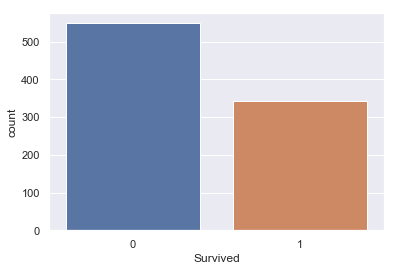

In [16]:
sns.countplot('Survived', data = dfTitanicTrain)

This plot shows the number of people who survived in contrast with those who died

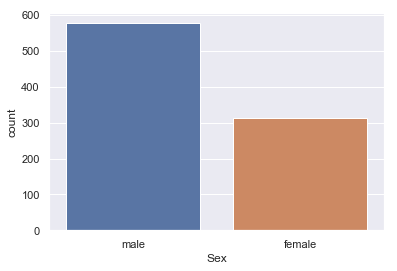

In [17]:
sns.countplot('Sex', data = dfTitanicTrain)

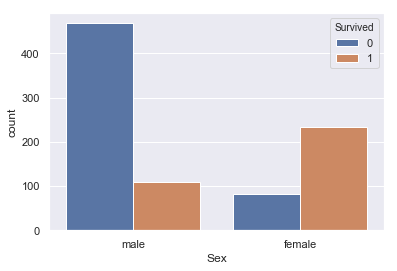

In [18]:
# number of people who survived genderwise
sns.countplot('Sex', hue = 'Survived', data = dfTitanicTrain)

Number of females who survived is more than males because when things like the titanic crash happens, women and children are given priority for safety.

3    491
1    216
2    184
Name: Pclass, dtype: int64


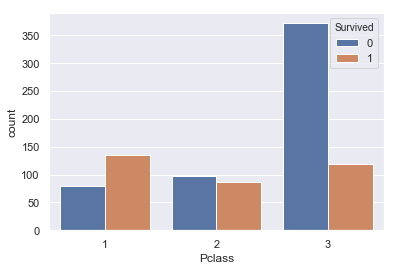

In [19]:
print(dfTitanicTrain['Pclass'].value_counts())
sns.countplot('Pclass', hue = 'Survived', data = dfTitanicTrain)

In [20]:
dfTitanicTrain.groupby('Pclass').sum()[['Survived']]

,Survived
Pclass,
1,136
2,87
3,119


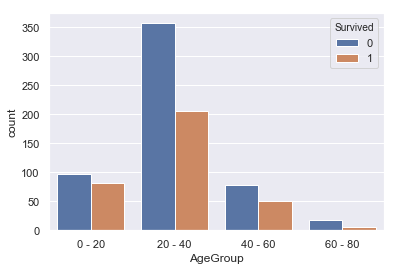

In [21]:
bins = [0, 20, 40, 60, 80]
labels = ['0 - 20', '20 - 40', '40 - 60', '60 - 80']
dfTitanicTrain['AgeGroup'] = pd.cut(dfTitanicTrain['Age'], bins, labels = labels, include_lowest = True)
sns.countplot('AgeGroup', hue = 'Survived', data = dfTitanicTrain)

### **Some More Data Cleaning**

In [25]:
dfTitanicTrain.replace({'Sex' : {'male' : 0, 'female' : 1}, 'Embarked' : {'S' : 0, 'C' : 1, 'Q' : 2}}, inplace = True)

In [26]:
dfTitanicTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,20 - 40
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,20 - 40
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,20 - 40
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,20 - 40
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,20 - 40


In [32]:
X = dfTitanicTrain.drop(columns = ['PassengerId', 'Survived', 'Name', 'Ticket', 'AgeGroup'], axis = 1)
Y = dfTitanicTrain['Survived']

In [36]:
dfTitanicTest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [37]:
dfTitanicTest.shape

(418, 11)

In [38]:
dfTitanicTest = dfTitanicTest.drop('Cabin', axis = 1)

In [40]:
dfTitanicTest['Age'].fillna(dfTitanicTest['Age'].mode()[0], inplace = True)

In [45]:
dfTitanicTest[dfTitanicTest['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [48]:
meanFare3 = dfTitanicTest.groupby('Pclass').mean().loc[3,'Fare']

since the missing value is the fare of a class 3 ticket, we replace it with the mean of class 3 ticket fares

In [50]:
dfTitanicTest['Fare'].fillna(meanFare3, inplace = True)

In [51]:
dfTitanicTest.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [55]:
dfTitanicTest.replace({'Sex' : {'male' : 0, 'female' : 1}, 'Embarked' : {'S' : 0, 'C' : 1, 'Q' : 2}}, inplace = True)

In [56]:
X_test = dfTitanicTest.drop(columns = ['PassengerId', 'Name', 'Ticket'])

# **Logistic Regression Model**

In [57]:
from sklearn.preprocessing import StandardScaler
slr = StandardScaler()
slr.fit(X)
X = slr.transform(X)
X_test = slr.transform(X_test)

In [58]:
from sklearn.linear_model import LogisticRegression
logisticModel = LogisticRegression()
logisticModel.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [60]:
from sklearn.metrics import accuracy_score
yhat = logisticModel.predict(X)
print('Accuracy of prediction on training data : ', accuracy_score(Y, yhat))

Accuracy of prediction on training data :  0.8002244668911336


In [62]:
yhatTest = logisticModel.predict(X_test)
yhatTest

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# **Decision Tree Classifier**

In [76]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3)
scores = []
for x in range(2, 50):
    dtc = DecisionTreeClassifier(max_depth = x)
    dtc.fit(xtrain, ytrain)
    scores.append(accuracy_score(ytest, dtc.predict(xtest)))
scores.index(max(scores)) + 2

5

The best value for max depth is 5, so we'll use that

In [88]:
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X, Y)
yhatDTC = dtc.predict(X_test)
dfTitanicTest['Survived'] = yhatTest

In [89]:
dfTitanicTest[['PassengerId', 'Survived']].set_index('PassengerId').to_csv('submissionLogistic.csv')